<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/08_NLP/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(14,10)})

In [ ]:
digits = load_digits()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    random_state=42)

In [ ]:
svc = SVC().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
svc.score(X_test, y_test), knn.score(X_test, y_test)

(0.9911111111111112, 0.9844444444444445)

In [ ]:
%%capture
!pip install umap-learn
import umap.umap_ as umap

In [ ]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


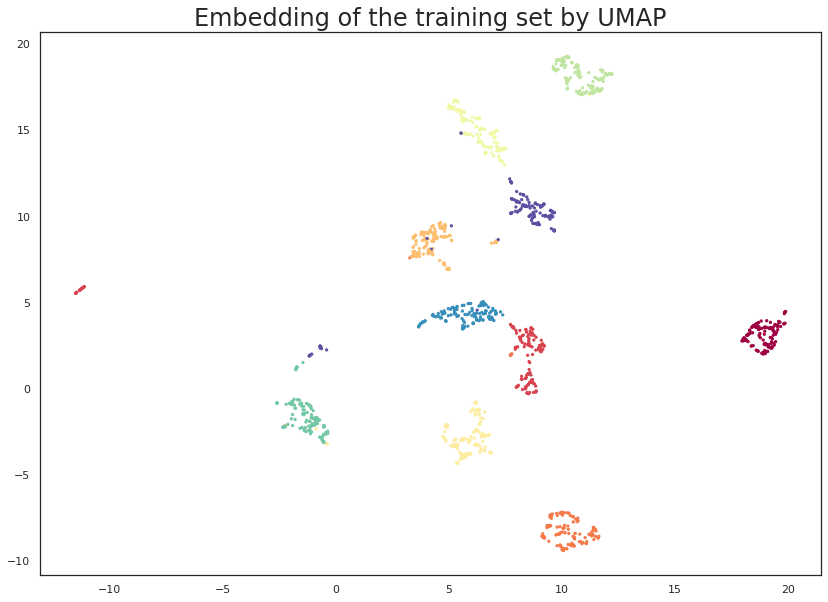

In [ ]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [ ]:
svc = SVC().fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

In [ ]:
%time test_embedding = trans.transform(X_test)

CPU times: user 6.57 s, sys: 36 ms, total: 6.61 s
Wall time: 6.86 s


Text(0.5, 1.0, 'Embedding of the test set by UMAP')

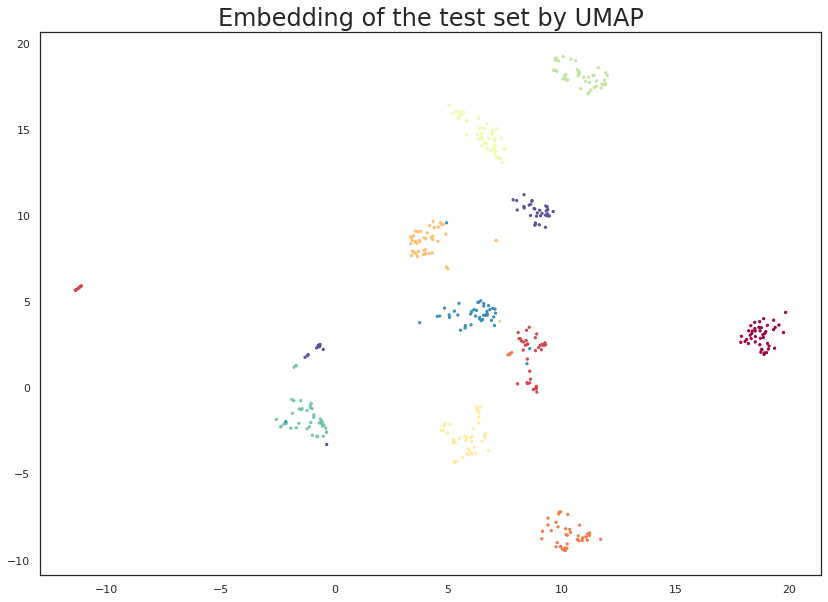

In [ ]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24)

In [ ]:
svc.score(trans.transform(X_test), y_test), knn.score(trans.transform(X_test), y_test)

(0.9666666666666667, 0.9822222222222222)